In [49]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [50]:
# Load the datasets
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [51]:
# Print the first 5 rows of the matches dataset
print(matches.head())

   id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad     

In [52]:
# Print the summary statistics of the matches dataset
print(matches.describe())

                 id       season  dl_applied  win_by_runs  win_by_wickets
count    756.000000   756.000000  756.000000   756.000000      756.000000
mean    1792.178571  2013.444444    0.025132    13.283069        3.350529
std     3464.478148     3.366895    0.156630    23.471144        3.387963
min        1.000000  2008.000000    0.000000     0.000000        0.000000
25%      189.750000  2011.000000    0.000000     0.000000        0.000000
50%      378.500000  2013.000000    0.000000     0.000000        4.000000
75%      567.250000  2016.000000    0.000000    19.000000        6.000000
max    11415.000000  2019.000000    1.000000   146.000000       10.000000


In [53]:
# Check for missing values in the matches dataset
print(matches.isnull().sum())

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64


In [71]:
# Find the most successful teams
most_successful_teams = matches.groupby('winner')['id'].count().reset_index().sort_values(by='id', ascending=False).head(4)
print(most_successful_teams)

                         winner   id
8                Mumbai Indians  109
0           Chennai Super Kings  100
7         Kolkata Knight Riders   92
13  Royal Challengers Bangalore   84


In [55]:
# Find the most successful players
most_successful_players = deliveries.groupby('batsman')['batsman_runs'].sum().reset_index().sort_values(by='batsman_runs', ascending=False).head(3)
print(most_successful_players)

       batsman  batsman_runs
486    V Kohli          5434
428   SK Raina          5415
367  RG Sharma          4914


In [56]:
# merging both dataframes
match_deliveries = pd.merge(matches, deliveries, left_on='id', right_on='match_id')

# extracting powerplay overs
powerplay_deliveries = match_deliveries[(match_deliveries['over']<=6)]
#
# finding out wickets in powerplay
powerplay_wickets = powerplay_deliveries[match_deliveries['player_dismissed'].notnull()].groupby('id')['player_dismissed'].count().reset_index(name='powerplay_wickets')


# merging powerplay wickets with matches dataframe
matches = pd.merge(matches, powerplay_wickets, on='id', how='outer')

# finding out if team won the match after losing wickets in powerplay
matches['winning_team'] = (matches['winner'] == matches['toss_winner']).astype(int)

# most successful teams
successful_teams = matches['winner'].value_counts().head(10)

# most successful players
successful_players = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)

# factors contributing to win or loss
factors_win_loss = matches.groupby('winner')[['win_by_runs', 'win_by_wickets']].mean()

print(successful_teams.head(3))
print(successful_players.head(5))
print(factors_win_loss)


Mumbai Indians           109
Chennai Super Kings      100
Kolkata Knight Riders     92
Name: winner, dtype: int64
batsman
V Kohli      5434
SK Raina     5415
RG Sharma    4914
DA Warner    4741
S Dhawan     4632
Name: batsman_runs, dtype: int64
                             win_by_runs  win_by_wickets
winner                                                  
Chennai Super Kings            17.780000        2.890000
Deccan Chargers                14.517241        2.482759
Delhi Capitals                  9.200000        2.900000
Delhi Daredevils               10.074627        4.104478
Gujarat Lions                   0.076923        5.000000
Kings XI Punjab                11.280488        3.268293
Kochi Tuskers Kerala            3.833333        5.000000
Kolkata Knight Riders          11.804348        3.815217
Mumbai Indians                 17.119266        2.816514
Pune Warriors                  11.583333        3.000000
Rajasthan Royals               11.933333        3.640000
Rising Pune Su

Most Successful Teams:  ['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders', 'Royal Challengers Bangalore']
Top Batsmen:  ['V Kohli', 'SK Raina', 'RG Sharma', 'DA Warner', 'S Dhawan']
Top Bowlers:  ['SL Malinga', 'DJ Bravo', 'A Mishra', 'Harbhajan Singh', 'PP Chawla']
Top MVPs:  ['CH Gayle', 'AB de Villiers', 'RG Sharma', 'MS Dhoni', 'DA Warner']


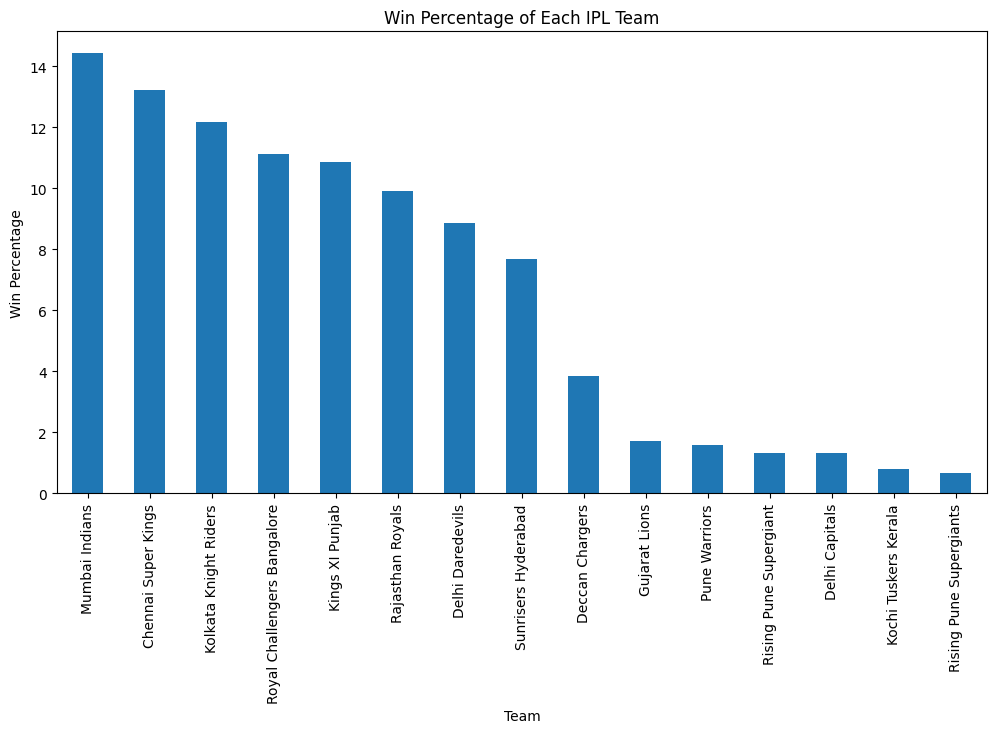

In [74]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the win percentage of each team
team_wins = matches.winner.value_counts() / len(matches) * 100

# Plot the win percentage of each team
plt.figure(figsize=(12,6))
team_wins.plot(kind='bar')
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.title('Win Percentage of Each IPL Team')

# Identify the most successful teams
# most_successful_teams = team_wins[team_wins >= 11].index.tolist()
print("Most Successful Teams: ", most_successful_teams)

# Calculate the top run scorers
batsmen_runs = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)
top_batsmen = batsmen_runs.head(5).index.tolist()
print("Top Batsmen: ", top_batsmen)

# Calculate the top wicket takers
wicket_takers = deliveries.dropna(subset=['dismissal_kind']).groupby('bowler')['dismissal_kind'].count().sort_values(ascending=False)
top_bowlers = wicket_takers.head(5).index.tolist()
print("Top Bowlers: ", top_bowlers)

# Calculate the most valuable players
mvp_counts = matches.player_of_match.value_counts().head(5)
top_mvps = mvp_counts.index.tolist()
print("Top MVPs: ", top_mvps)
